In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
#24MAI0104(GOWTHAM.J)


In [3]:
# Load the titanic dataset#24MAI0104(GOWTHAM.J)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [4]:
# Display the first few rows of the dataset
df.head()#24MAI0104(GOWTHAM.J)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()#24MAI0104(GOWTHAM.J)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
age_imputer=SimpleImputer(strategy='median')
embarked_imputer=SimpleImputer(strategy='most_frequent')#24MAI0104(GOWTHAM.J)

In [7]:
df['Age']=age_imputer.fit_transform(df[['Age']])
df['Embarked']=embarked_imputer.fit_transform(df[['Embarked']]).ravel()#24MAI0104(GOWTHAM.J)


In [8]:
df.drop(columns=['Cabin'],inplace=True)#24MAI0104(GOWTHAM.J)


In [9]:
print(df.isnull().sum())#24MAI0104(GOWTHAM.J)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
df.head()#24MAI0104(GOWTHAM.J)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
df.shape

(891, 11)

In [12]:
encoder=OneHotEncoder (sparse_output=False, drop='first')
encoded_sex_embarked=encoder.fit_transform (df [['Sex', 'Embarked']])
encoded_df = pd.DataFrame (encoded_sex_embarked,
columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

In [13]:
df.drop(columns=['Sex','Embarked'],inplace=True)
df=pd.concat([df,encoded_df],axis=1)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,1.0


In [15]:
#feature scaling 
#24MAI0104(GOWTHAM.J)
scaler=StandardScaler()
numerical_features=['Age','Fare']
df[numerical_features]=scaler.fit_transform(df[numerical_features])

In [16]:
#24MAI0104(GOWTHAM.J)
#feature selection
#Select features and target variable
features=['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
target='Survived'

In [17]:
x=df[features]
y=df[target]

In [18]:
#split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
print("24MAI0104(GOWTHAM.J)");
print("Training set shape:",x_train.shape)
print("Testing set shape:",x_test.shape)


24MAI0104(GOWTHAM.J)
Training set shape: (712, 8)
Testing set shape: (179, 8)


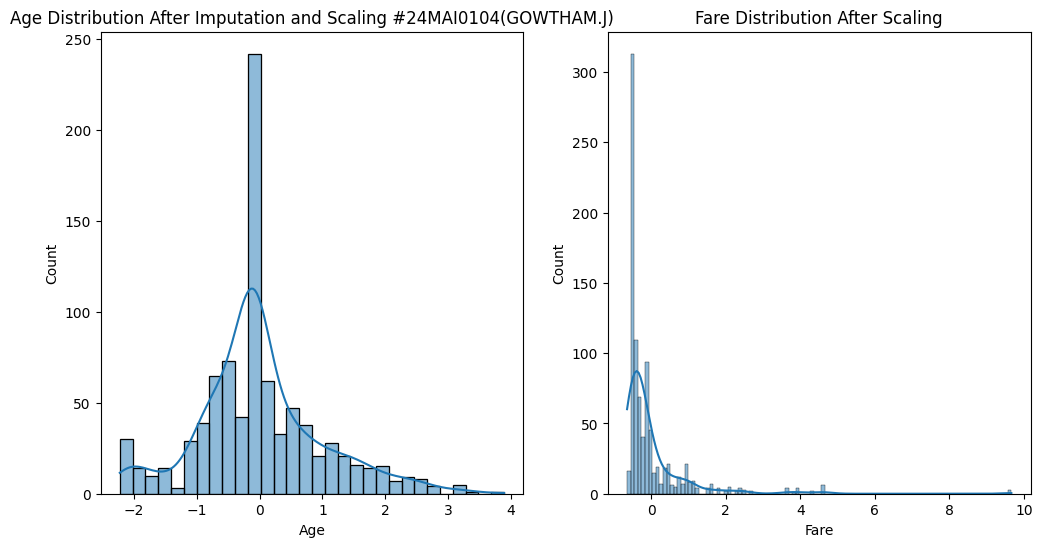

In [22]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

sns.histplot(df['Age'],kde=True,ax=ax[0])
ax[0].set_title('Age Distribution After Imputation and Scaling #24MAI0104(GOWTHAM.J)')

sns.histplot(df['Fare'],kde=True,ax=ax[1])
ax[1].set_title('Fare Distribution After Scaling')

plt.show()